#### Импортируем библиотеки для работы

In [22]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import pywt
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample 
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.spatial import distance
from scipy.signal import lfilter
from scipy import signal
from typing import List
from datetime import datetime

# Раздел 1

## Задание 1

#### Подготовим таблицы значений функции sin(x), где x изменяется от 0 до 10 с шагом 0,05. 

In [23]:
x = np.arange(0, 10, 0.05)
y = np.sin(x)

y_f = pd.DataFrame(y, columns=['Y'])
y_f.describe()

,Y
count,200.000000
mean,0.185229
std,0.666609
min,-0.999923
25%,-0.379695
50%,0.315320
75%,0.809726
max,0.999992


#### Удалим некоторые значения функции, для получения пропущенных данных.

In [24]:
y_n = y.__deepcopy__(y)
y_n[1::10] = None

y_tar = pd.DataFrame(y_n, columns=['Y'])
y_tar.describe()

,Y
count,180.000000
mean,0.184359
std,0.667405
min,-0.999923
25%,-0.383538
50%,0.315320
75%,0.809726
max,0.999992


#### Восстановим значения, воспользовавшись fillna.

In [25]:
y_fi = y_tar.fillna(method='ffill')
y_fi.describe()

,Y
count,200.000000
mean,0.185290
std,0.666565
min,-0.999923
25%,-0.368329
50%,0.315320
75%,0.809726
max,0.999992


#### Найдем среднюю ошибку, сраванив результаты.

In [26]:
diff = y_f - y_fi
diff = [res for res in diff.values if float(res) > 0.0]
sum(diff)/len(diff)

array([0.03230465])

## Задание 2

In [27]:
ank = pd.read_csv("D:\\МИРЭА\\Машинное обучение\\Пр5\\anketa.csv", encoding='windows-1251', sep='\t')
ank

,Фамилия,Имя,Отчество,КодАнкеты,"Сумма кредита, руб#"
0,Абаджев,Николай,Васильевич,3049,47000
1,Абаев,Александр,Викторович,3061,32000
2,Алексенко,Дмитрий,Дмитриевич,4012,64000
3,Беляев,Юрий,Алефтинович,3053,25000
4,Бобров,Андрей,Владимирович,4076,105000
...,...,...,...,...,...
82,Якуб,Андрей,Сергеевич,4077,17000
83,Бобров,Андрей,Владимирович,4076,105000
84,Широкова,Светлана,Николаевна,4000,54000
85,Полякова,Тамара,Ивановна,3076,36000


In [28]:
ank.describe()

,КодАнкеты,"Сумма кредита, руб#"
count,87.000000,87.000000
mean,3792.471264,50160.919540
std,427.087482,20141.865207
min,3049.000000,17000.000000
25%,3537.500000,38000.000000
50%,4021.000000,47000.000000
75%,4056.500000,60500.000000
max,4084.000000,140000.000000


#### Построим распределение с помощью plt.hist()

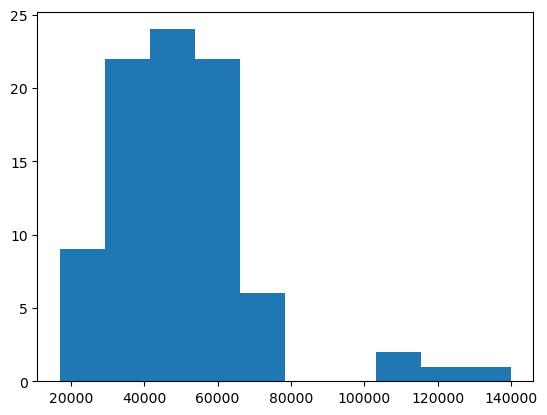

In [29]:
plt.hist(ank['Сумма кредита, руб#'])
plt.show()

#### Отобразим выбросы по сумме кредита с помощью диаграммы размаха.

<Axes: >

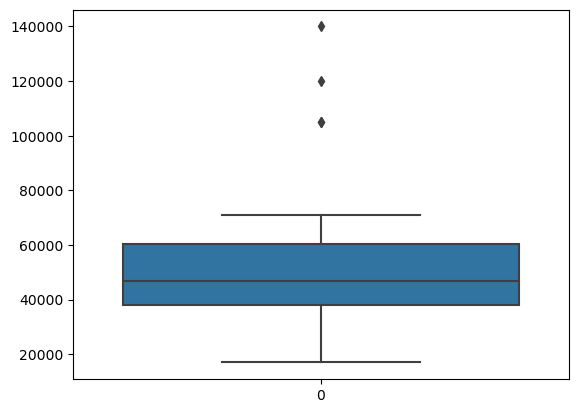

In [30]:
sns.boxplot(ank['Сумма кредита, руб#'])

#### Уберем значения, которые больше 80000.

In [31]:
ank_8 = ank.loc[ank['Сумма кредита, руб#'] <= 80000]
ank_8

,Фамилия,Имя,Отчество,КодАнкеты,"Сумма кредита, руб#"
0,Абаджев,Николай,Васильевич,3049,47000
1,Абаев,Александр,Викторович,3061,32000
2,Алексенко,Дмитрий,Дмитриевич,4012,64000
3,Беляев,Юрий,Алефтинович,3053,25000
5,Бочкарев,Рудольф,Алексеевич,4002,31000
...,...,...,...,...,...
81,Шуклин,Виталий,Георгиевич,3067,36000
82,Якуб,Андрей,Сергеевич,4077,17000
84,Широкова,Светлана,Николаевна,4000,54000
85,Полякова,Тамара,Ивановна,3076,36000


In [32]:
ank_8.describe()

,КодАнкеты,"Сумма кредита, руб#"
count,83.000000,83.000000
mean,3779.759036,46915.662651
std,433.256601,13548.652007
min,3049.000000,17000.000000
25%,3076.000000,38000.000000
50%,4020.000000,46000.000000
75%,4054.500000,59000.000000
max,4084.000000,71000.000000


#### Построим новое распределени.

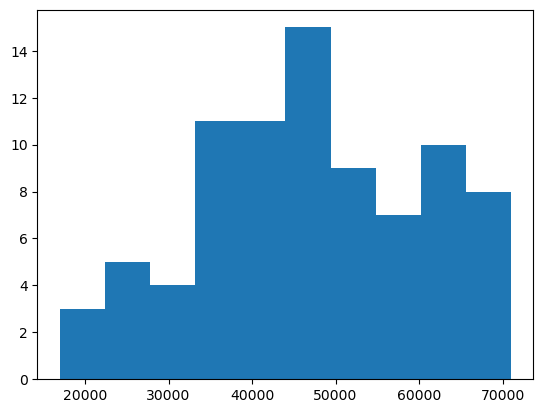

In [33]:
plt.hist(ank_8['Сумма кредита, руб#'])
plt.show()

## Задание 

In [34]:
dyn_web = pd.read_csv("D://МИРЭА//Машинное обучение//Пр5//dynamics_website.csv", encoding='windows-1251', sep='\t')
dyn_web.head()

,Дата,Посещения
0,01.01.2009,"163,654"
1,01.12.2008,"180,472"
2,01.11.2008,"184,68"
3,01.10.2008,"190,564"
4,01.09.2008,"164,578"


#### Преобразуем данные.

In [35]:
dyn_web['Посещения'] = [int(val.replace(',', '')) for val in dyn_web['Посещения'].values]
dyn_web['Дата'] = [datetime.strptime(val, '%d.%m.%Y').date() for val in dyn_web['Дата'].values]

#### Построим график изменений трафика.

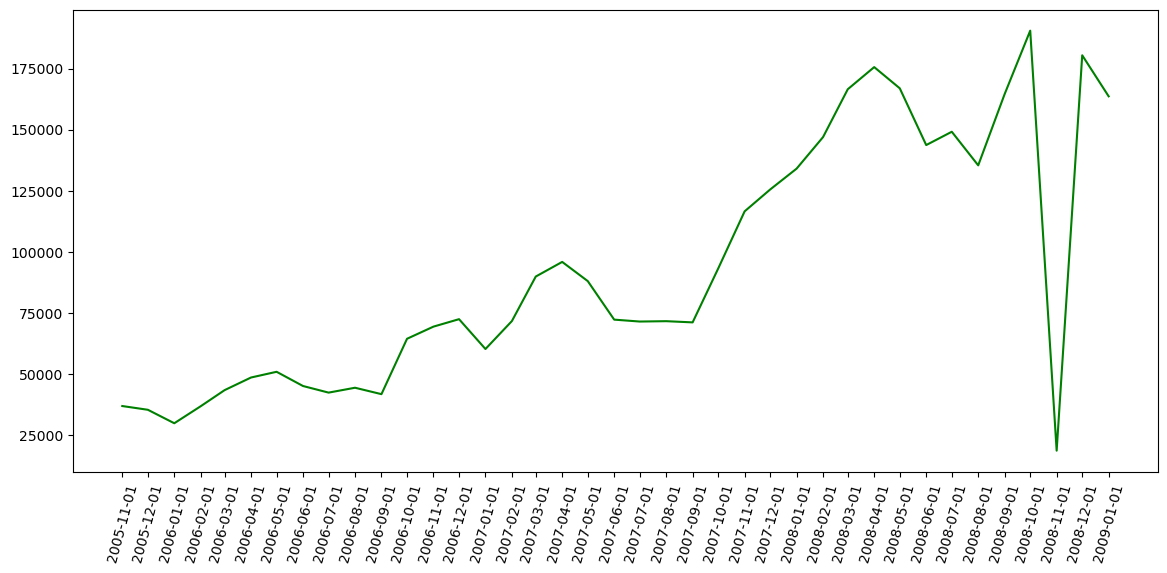

In [36]:
plt.figure(figsize = (14,6))
plt.plot(dyn_web['Дата'], dyn_web['Посещения'],  c='green')
plt.xticks(dyn_web['Дата'], rotation=75)
plt.show()

#### Воспользуемся фильтром Савицкого-Голея.

In [37]:
yh_ = [signal.savgol_filter(dyn_web['Посещения'], x, 3) for x in [4, 5, 7, 10, 15]]

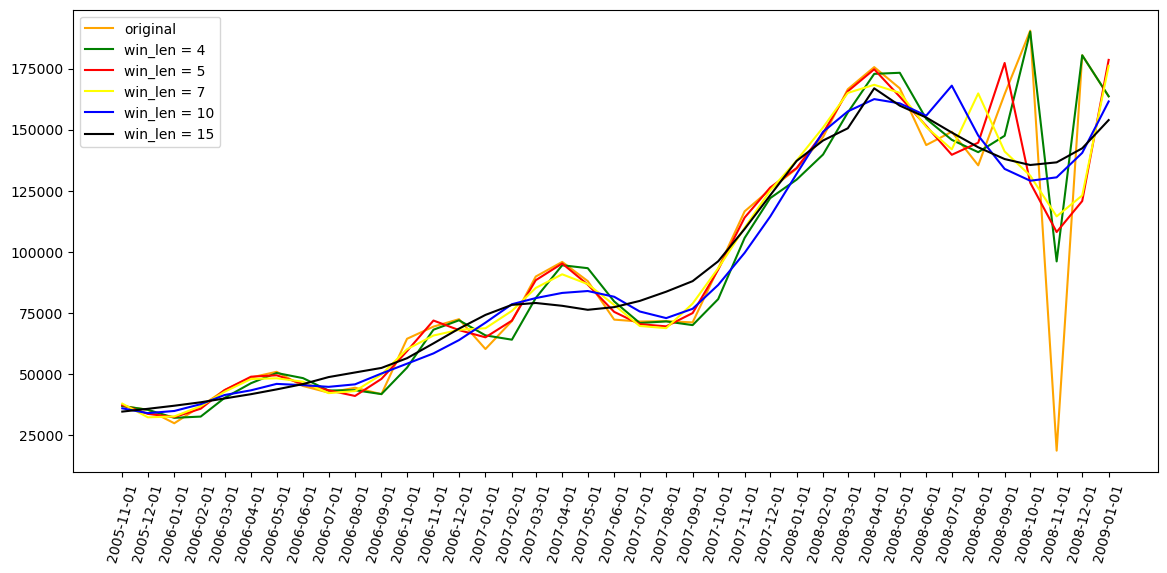

In [38]:
plt.figure(figsize = (14,6))
plt.plot(dyn_web['Дата'], dyn_web['Посещения'], label='original', c='orange')
plt.plot(dyn_web['Дата'], yh_[0], label='win_len = 4', c='green')
plt.plot(dyn_web['Дата'], yh_[1], label='win_len = 5', c='red')
plt.plot(dyn_web['Дата'], yh_[2], label='win_len = 7', c='yellow')
plt.plot(dyn_web['Дата'], yh_[3], label='win_len = 10', c='blue')
plt.plot(dyn_web['Дата'], yh_[4], label='win_len = 15', c='black')
plt.xticks(dyn_web['Дата'], rotation=75)
plt.legend(loc='best')
plt.show()

#### Сравним с методом скользящего среднего.

In [39]:
we = [[0.1, 0.2, 0.3, 0.4], [0.2, 0.3, 0.5], [0.2, 0.4, 0.4], [0.15, 0.15, 0.7], [0.2, 0.35, 0.3, 0.15]]
we_y = [np.convolve(dyn_web['Посещения'], np.array(w)[::-1],'same') for w in we]

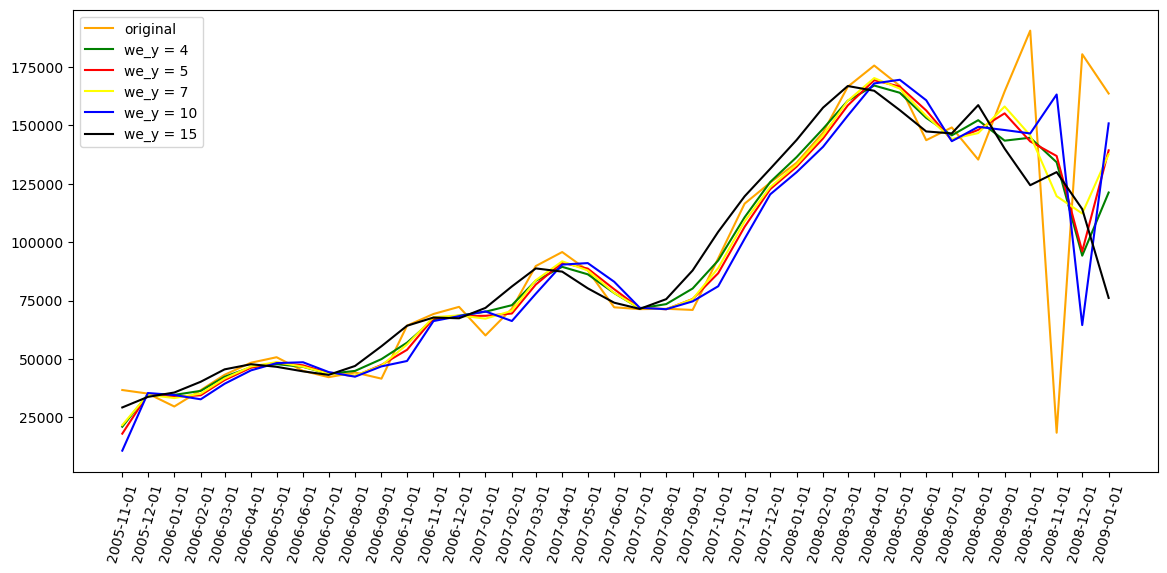

In [40]:
plt.figure(figsize = (14,6))
plt.plot(dyn_web['Дата'], dyn_web['Посещения'], label='original', c='orange')
plt.plot(dyn_web['Дата'], we_y[0], label='we_y = 4', c='green')
plt.plot(dyn_web['Дата'], we_y[1], label='we_y = 5', c='red')
plt.plot(dyn_web['Дата'], we_y[2], label='we_y = 7', c='yellow')
plt.plot(dyn_web['Дата'], we_y[3], label='we_y = 10', c='blue')
plt.plot(dyn_web['Дата'], we_y[4], label='we_y = 15', c='black')
plt.xticks(dyn_web['Дата'], rotation=75)
plt.legend(loc='best')
plt.show()

#### Выполним вычитание шума

In [41]:
noi = [2, 3, 5, 7, 10]
noi_y = [lfilter([1.0 / n] * n, 1, dyn_web['Посещения']) for n in noi]

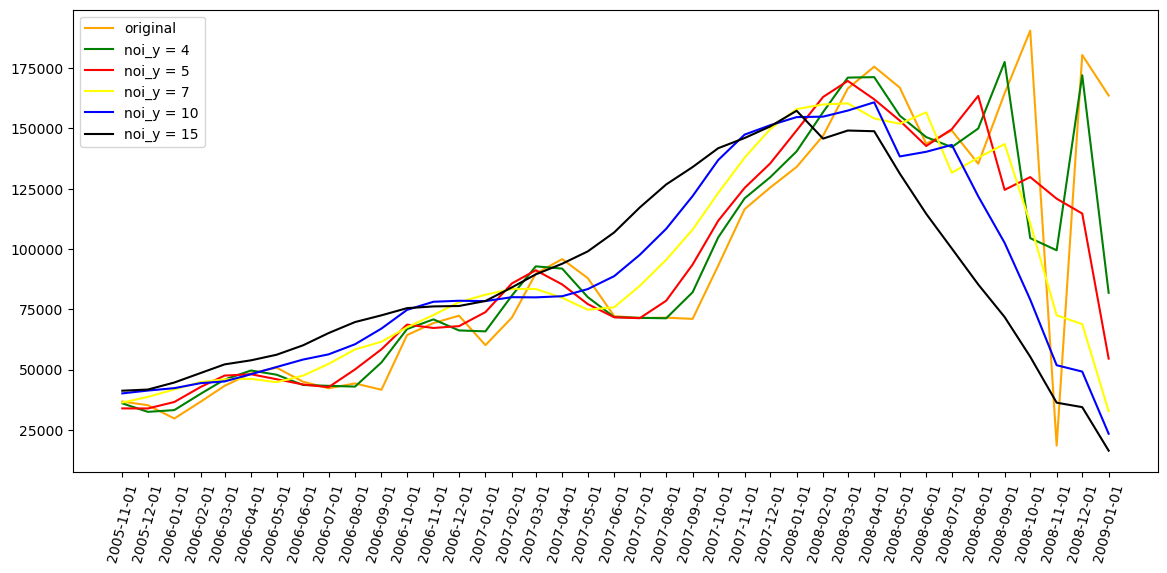

In [42]:
plt.figure(figsize = (14,6))
plt.plot(dyn_web['Дата'], dyn_web['Посещения'], label='original', c='orange')
plt.plot(dyn_web['Дата'], noi_y[0], label='noi_y = 4', c='green')
plt.plot(dyn_web['Дата'], noi_y[1], label='noi_y = 5', c='red')
plt.plot(dyn_web['Дата'], noi_y[2], label='noi_y = 7', c='yellow')
plt.plot(dyn_web['Дата'], noi_y[3], label='noi_y = 10', c='blue')
plt.plot(dyn_web['Дата'], noi_y[4], label='noi_y = 15', c='black')
plt.xticks(dyn_web['Дата'], rotation=75)
plt.legend(loc='best')
plt.show()

#### Воспользуемся вейвлет-преобразованием.

In [43]:
coef = pywt.wavedec(dyn_web['Посещения'], 'db3', level=6)
thr_sh = 1
coef_thr_sh = [pywt.threshold(c, thr_sh, mode='soft') for c in coef]
den_sig = pywt.waverec(coef_thr_sh, 'db3')

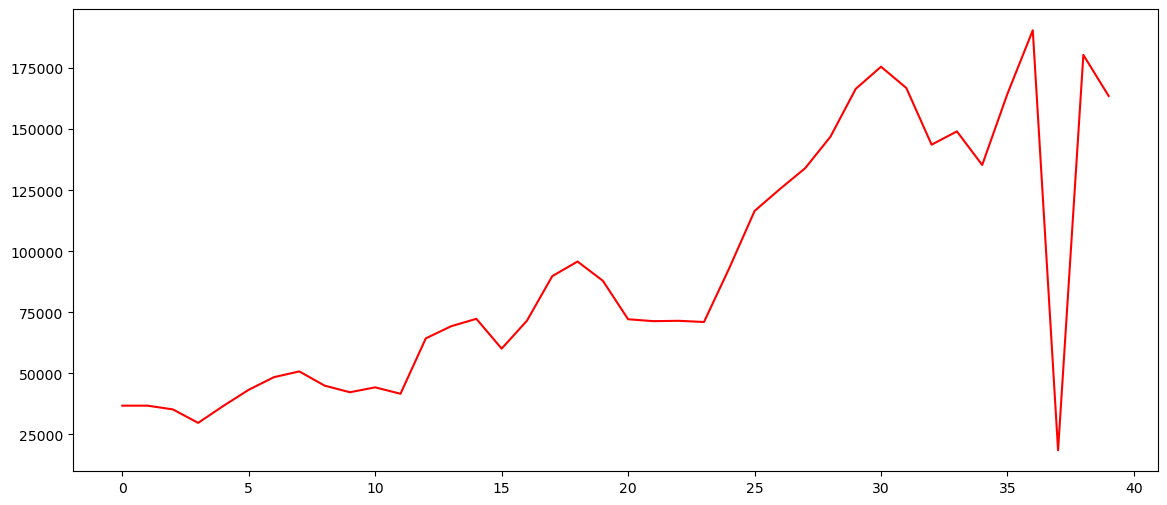

In [44]:
plt.figure(figsize = (14,6))
plt.plot(den_sig[::-1], c='red')
plt.show()

## Самостоятельная работа

In [45]:
tr = pd.read_csv("D:\\МИРЭА\\Машинное обучение\\Пр5\\trade.csv", encoding='windows-1251', sep='\t')
tr.head()

,Дата (Год + Месяц),Количество
0,2000-M01,462523.4190
1,2000-M02,633208.1960
2,2000-M03,660159.2990
3,2000-M04,617455.3417
4,2000-M05,597354.4794


In [46]:
tr.describe()

,Количество
count,5.000000e+01
mean,1.651531e+06
std,5.549682e+05
min,4.625234e+05
25%,1.370451e+06
50%,1.701352e+06
75%,2.080112e+06
max,2.662781e+06


#### Построим график исходных данных.

In [113]:
plt.figure(figsize = (14,6))
plt.plot(tr['Дата (Год + Месяц)'], trade['Количество'], c='yellow')
plt.xticks(tr['Дата (Год + Месяц)'], rotation=75)
plt.show()

NameError: name 'trade' is not defined

<Figure size 1400x600 with 0 Axes>

#### Построим диаграмму размаха.

<Axes: >

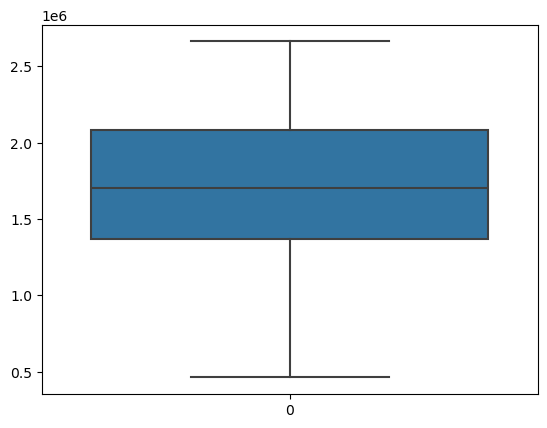

In [48]:
sns.boxplot(tr['Количество'])

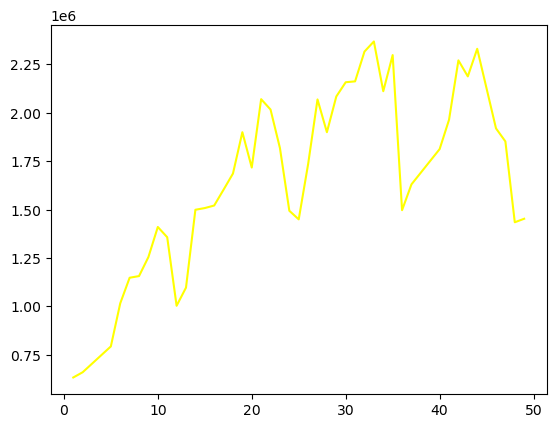

In [49]:
lq, uq = tr['Количество'].quantile([.05, .95])
quan = tr.loc[(tr['Количество'] > lq) & (tr['Количество'] < uq)]
plt.plot(quan['Количество'], c='yellow')

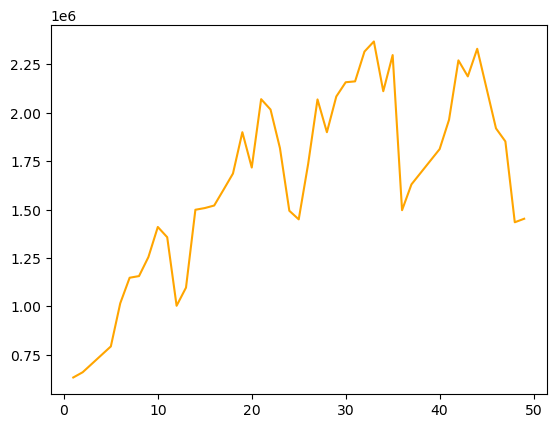

In [50]:
plt.plot(quan['Количество'], c='orange')

In [51]:
tr = quan.__deepcopy__()

#### Аппроксимируем и выберем оптимальный.

In [52]:
dt = range(len(tr['Количество']))
coef_poly = [np.polyfit(dt, tr['Количество'], deg) for deg in [3, 5, 7, 10, 15, 20, 25]]
poly_n = [poly(dt) for poly in[np.poly1d(cf) for cf in coef_poly]]
mse_s = [np.round(np.mean(poly)/len(dt), 4) for poly in poly_n]

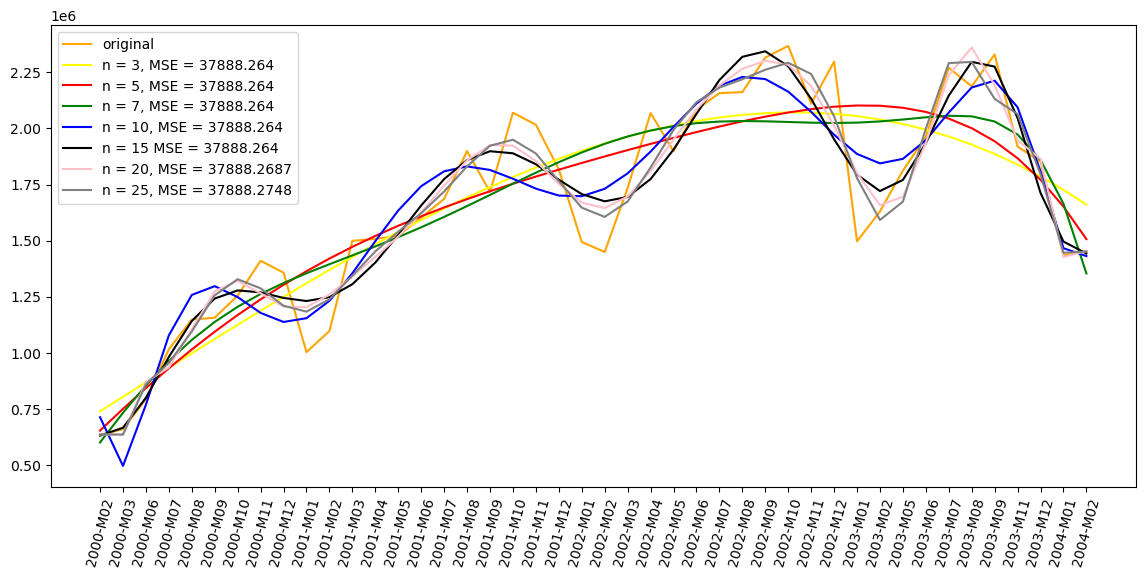

In [53]:
plt.figure(figsize = (14,6))
plt.plot(tr['Дата (Год + Месяц)'], tr['Количество'], label='original', c='orange')
plt.plot(tr['Дата (Год + Месяц)'], poly_n[0], label=f'n = 3, MSE = {mse_s[0]}', c='yellow')
plt.plot(tr['Дата (Год + Месяц)'], poly_n[1], label=f'n = 5, MSE = {mse_s[1]}', c='red')
plt.plot(tr['Дата (Год + Месяц)'], poly_n[2], label=f'n = 7, MSE = {mse_s[2]}', c='green')
plt.plot(tr['Дата (Год + Месяц)'], poly_n[3], label=f'n = 10, MSE = {mse_s[3]}', c='blue')
plt.plot(tr['Дата (Год + Месяц)'], poly_n[4], label=f'n = 15 MSE = {mse_s[4]}', c='black')
plt.plot(tr['Дата (Год + Месяц)'], poly_n[5], label=f'n = 20, MSE = {mse_s[5]}', c='pink')
plt.plot(tr['Дата (Год + Месяц)'], poly_n[6], label=f'n = 25, MSE = {mse_s[6]}', c='grey')
plt.xticks(tr['Дата (Год + Месяц)'], rotation=75)
plt.legend(loc='best')
plt.show()

#### Выстовим степень полинома равной 25.

In [54]:
tr['Количество'] = poly_n[6]

#### Построим графики сглаживания.

In [55]:
yh_ = [signal.savgol_filter(tr['Количество'], x, 3) for x in [4, 5, 7, 10, 15]]
mse_s = [np.round(np.mean(yh)/len(dt), 4) for yh in yh_]

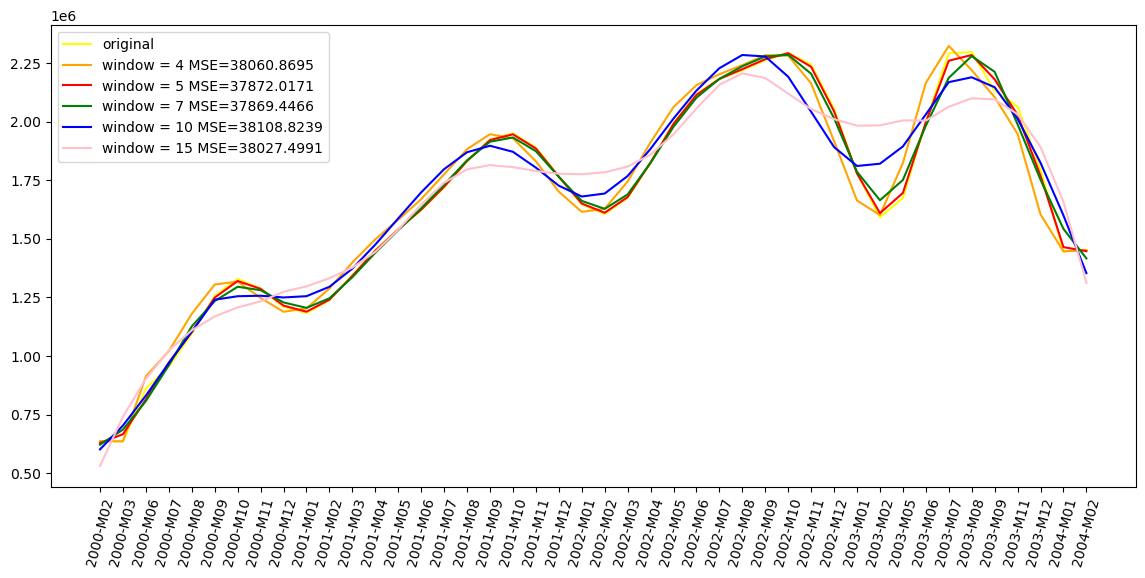

In [56]:
plt.figure(figsize = (14,6))
plt.plot(tr['Дата (Год + Месяц)'], tr['Количество'], label='original', c='yellow')
plt.plot(tr['Дата (Год + Месяц)'], yh_[0], label=f'window = 4 MSE={mse_s[0]}',  c='orange')
plt.plot(tr['Дата (Год + Месяц)'], yh_[1], label=f'window = 5 MSE={mse_s[1]}', c='red')
plt.plot(tr['Дата (Год + Месяц)'], yh_[2], label=f'window = 7 MSE={mse_s[2]}', c='green')
plt.plot(tr['Дата (Год + Месяц)'], yh_[3], label=f'window = 10 MSE={mse_s[3]}', c='blue')
plt.plot(tr['Дата (Год + Месяц)'], yh_[4], label=f'window = 15 MSE={mse_s[4]}', c='pink')
plt.xticks(tr['Дата (Год + Месяц)'], rotation=75)
plt.legend(loc='best')
plt.show()

#### Сравним с графиком, после отсечения выбросов.

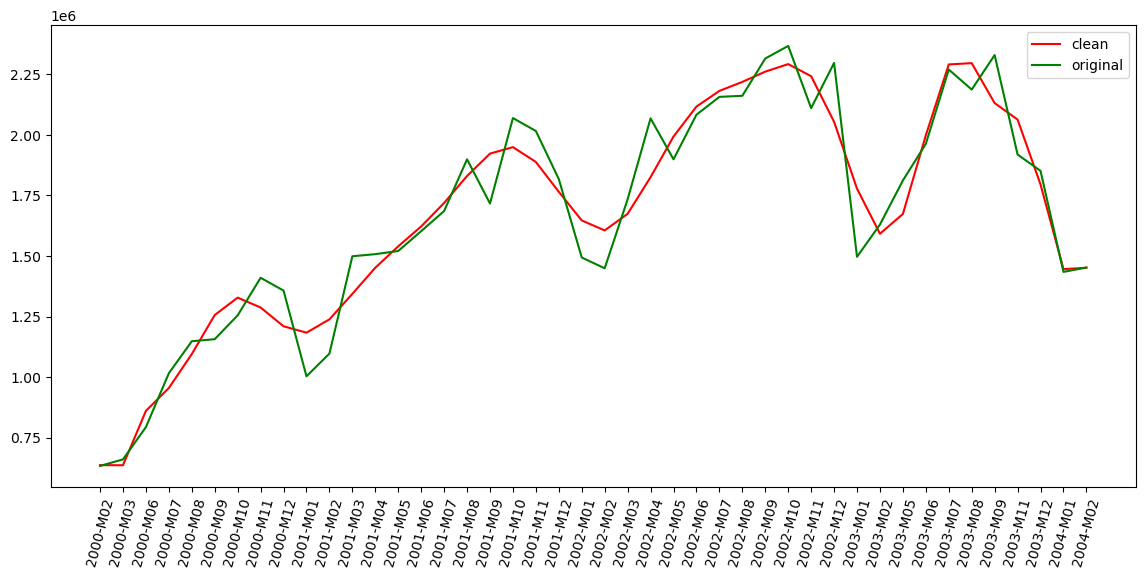

In [57]:
plt.figure(figsize = (14,6))
plt.plot(tr['Дата (Год + Месяц)'], tr['Количество'], label='clean', c='red')
plt.plot(tr['Дата (Год + Месяц)'], quan['Количество'], label='original', c='green')
plt.xticks(tr['Дата (Год + Месяц)'], rotation=75)
plt.legend(loc='best')
plt.show()

# Раздел 2

In [58]:
pop = pd.read_csv("D:\\МИРЭА\\Машинное обучение\\Пр5\\population.csv", encoding='windows-1251', sep='\t')
pop.head()

,Регион,Численность населения (тыс. чел.),Удельный вес городского населения %,Изменение численности населения,Число родившихся на 1000 населения.,Число умерших на 1000 .,Среднегодовая численность населения занятых в экономике (тыс. чел.),Среднедушевые денежные доходы (руб./мес.)
0,Республика Карелия,766,"74,1","-0,8","7,9","15,1","331,5","1673,4"
1,Республика Коми,1135,"74,2","-1,3","8,5","10,7","495,3","1654,4"
2,Архангельская область,1460,"74,4","-1,3","8,1","15,1","587,8",2058
3,Ненецкий АО,46,"59,2","-0,6","11,2","9,4","20,7","1268,8"
4,Вологодская область,1324,"68,4","-0,7","7,9","15,8","598,4","1692,1"


In [59]:
pop.describe()

,Численность населения (тыс. чел.)
count,89.000000
mean,1666.280899
std,1506.263416
min,18.000000
25%,729.000000
50%,1269.000000
75%,2224.000000
max,8631.000000


In [60]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 8 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Регион                                                                89 non-null     object
 1   Численность населения (тыс. чел.)                                     89 non-null     int64 
 2   Удельный вес городского населения %                                   89 non-null     object
 3   Изменение численности населения                                       89 non-null     object
 4   Число родившихся на 1000 населения.                                   89 non-null     object
 5   Число умерших на 1000 .                                               89 non-null     object
 6   Среднегодовая численность населения занятых в экономике  (тыс. чел.)  89 non-null     object
 7   Среднедушев

#### Приведем данные к численному виду, за исключением региона.

In [61]:
cols = pop.columns.delete([0, 1])
for col in cols:
    pop[col] = [float(str(val).replace(',', '')) for val in pop[col]]
pop.describe()

,Численность населения (тыс. чел.),Удельный вес городского населения %,Изменение численности населения,Число родившихся на 1000 населения.,Число умерших на 1000 .,Среднегодовая численность населения занятых в экономике (тыс. чел.),Среднедушевые денежные доходы (руб./мес.)
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,1666.280899,588.471910,-3.404494,78.415730,133.617978,6613.123596,11401.370787
std,1506.263416,237.073305,64.823137,36.164337,42.955184,7505.399106,8713.528594
min,18.000000,0.000000,-269.000000,0.000000,0.000000,0.000000,0.000000
25%,729.000000,536.000000,-9.000000,72.000000,122.000000,1750.000000,7673.000000
50%,1269.000000,659.000000,-6.000000,79.000000,138.000000,4716.000000,10473.000000
75%,2224.000000,744.000000,-3.000000,93.000000,158.000000,7926.000000,14217.000000
max,8631.000000,919.000000,537.000000,179.000000,214.000000,53997.000000,68591.000000


#### Построим диаграмму размаха.

In [62]:
dir_col = ['Удельный вес городского населения %', 'Изменение численности населения',
             'Среднегодовая численность населения занятых в экономике  (тыс. чел.)',
             'Среднедушевые денежные доходы (руб./мес.)']

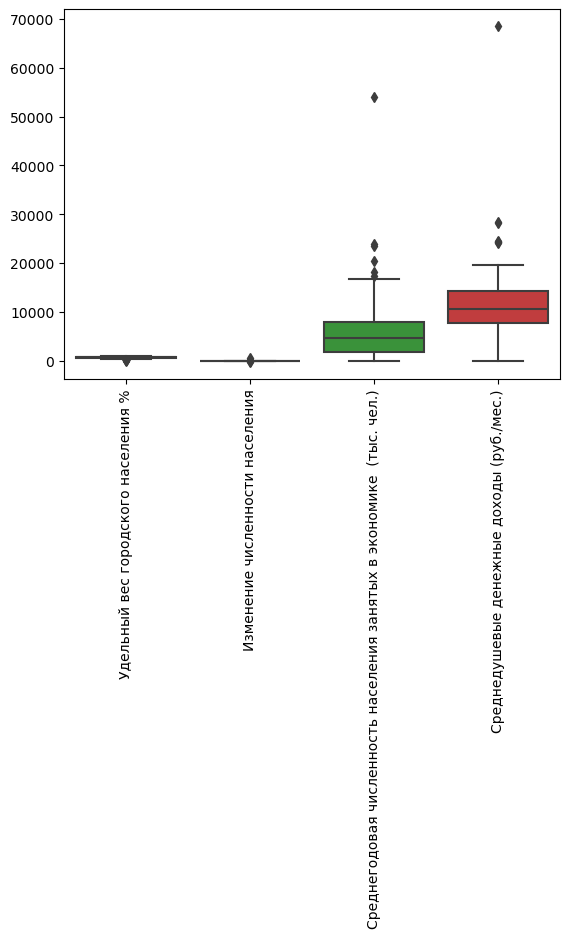

In [63]:
sns.boxplot(pop[dir_col])
plt.xticks(rotation=90)
plt.show()

#### Выберем медианные значения и установим степень разброса не больше, чем в 10 раз от медианного, почистим от шумов.

In [64]:
q_pop = pop.__deepcopy__()
meds = [q_pop[col].median() for col in dir_col]
for col, med in zip(dir_col, meds):
    q_pop = q_pop.loc[(abs(q_pop[col]) > abs(med*0.1)) & (abs(q_pop[col]) < abs(med*10))]
for col in dir_col:
    q_pop[col] = signal.savgol_filter(q_pop[col], 5, 3)

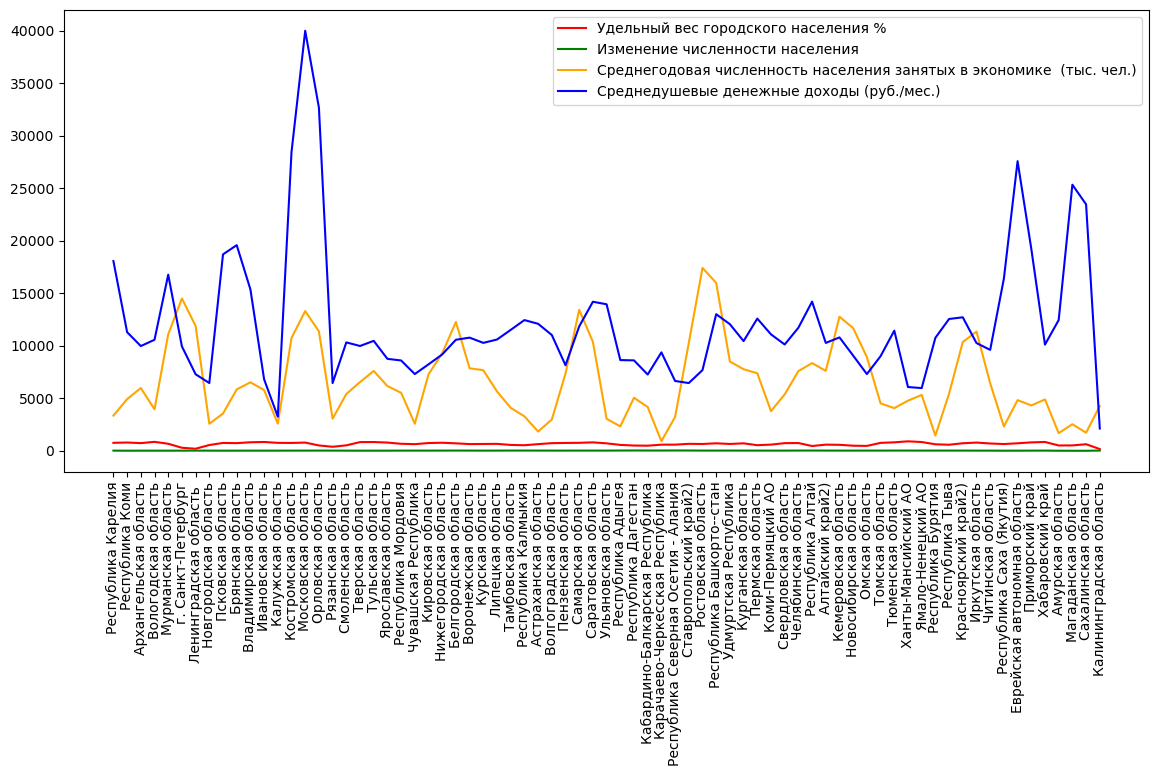

In [65]:
plt.figure(figsize = (14,6))
plt.plot(q_pop['Регион'], q_pop[dir_col[0]], label=dir_col[0], c='red')
plt.plot(q_pop['Регион'], q_pop[dir_col[1]], label=dir_col[1], c='green')
plt.plot(q_pop['Регион'], q_pop[dir_col[2]], label=dir_col[2], c='orange')
plt.plot(q_pop['Регион'], q_pop[dir_col[3]], label=dir_col[3], c='blue')
plt.xticks(q_pop['Регион'], rotation=90)
plt.legend(loc='best')
plt.show()

In [66]:
q_pop.describe()

,Численность населения (тыс. чел.),Удельный вес городского населения %,Изменение численности населения,Число родившихся на 1000 населения.,Число умерших на 1000 .,Среднегодовая численность населения занятых в экономике (тыс. чел.),Среднедушевые денежные доходы (руб./мес.)
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,1717.561644,631.988845,-5.943053,76.342466,141.150685,6562.870450,12097.610763
std,1238.012307,146.800432,5.211004,33.580012,38.665112,3766.830704,6411.979853
min,152.000000,143.357143,-21.457143,7.000000,14.000000,895.914286,2095.828571
25%,949.000000,546.942857,-8.828571,71.000000,126.000000,3755.028571,8619.171429
50%,1357.000000,646.142857,-5.485714,79.000000,144.000000,5631.371429,10555.685714
75%,2459.000000,733.171429,-3.171429,91.000000,165.000000,8484.228571,12572.085714
max,6511.000000,879.342857,6.714286,179.000000,214.000000,17404.514286,39993.114286


#### Обучим модель kmeans, чтобы найти 4 кластера.

In [67]:
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(q_pop[dir_col])

KMeans(n_clusters=4)

In [68]:
q_pop['Кластер_4'] = kmeans4.predict(q_pop[dir_col]) 
q_pop.loc[q_pop['Кластер_4'] == 0].head(3)

,Регион,Численность населения (тыс. чел.),Удельный вес городского населения %,Изменение численности населения,Число родившихся на 1000 населения.,Число умерших на 1000 .,Среднегодовая численность населения занятых в экономике (тыс. чел.),Среднедушевые денежные доходы (руб./мес.),Кластер_4
1,Республика Коми,1135,766.000000,-14.314286,85.0,107.0,4899.285714,11279.257143,0
2,Архангельская область,1460,708.000000,-11.028571,81.0,151.0,5958.571429,9955.114286,0
4,Вологодская область,1324,830.228571,-11.971429,79.0,158.0,3928.228571,10555.685714,0


In [69]:
q_pop.loc[q_pop['Кластер_4'] == 1].head(3)

,Регион,Численность населения (тыс. чел.),Удельный вес городского населения %,Изменение численности населения,Число родившихся на 1000 населения.,Число умерших на 1000 .,Среднегодовая численность населения занятых в экономике (тыс. чел.),Среднедушевые денежные доходы (руб./мес.),Кластер_4
5,Мурманская область,983,645.742857,-11.600000,76.0,101.0,11074.000000,16756.542857,1
6,г. Санкт-Петербург,4694,267.057143,-9.228571,62.0,154.0,14487.142857,9922.171429,1
7,Ленинградская область,1674,172.971429,-4.857143,65.0,178.0,11866.485714,7267.085714,1


In [70]:
q_pop.loc[q_pop['Кластер_4'] == 2].head(3)

,Регион,Численность населения (тыс. чел.),Удельный вес городского населения %,Изменение численности населения,Число родившихся на 1000 населения.,Число умерших на 1000 .,Среднегодовая численность населения занятых в экономике (тыс. чел.),Среднедушевые денежные доходы (руб./мес.),Кластер_4
14,Костромская область,786,724.314286,-6.885714,77.0,178.0,10729.000000,28440.314286,2
16,Московская область,6511,760.114286,-6.457143,68.0,167.0,13287.657143,39993.114286,2
17,Орловская область,899,486.742857,-3.171429,73.0,165.0,11350.171429,32673.828571,2


In [71]:
q_pop.loc[q_pop['Кластер_4'] == 3].head(3)

,Регион,Численность населения (тыс. чел.),Удельный вес городского населения %,Изменение численности населения,Число родившихся на 1000 населения.,Число умерших на 1000 .,Среднегодовая численность населения занятых в экономике (тыс. чел.),Среднедушевые денежные доходы (руб./мес.),Кластер_4
0,Республика Карелия,766,735.000000,-7.671429,79.0,151.0,3328.428571,18050.185714,3
9,Псковская область,801,726.542857,-11.371429,7.0,214.0,3528.400000,18690.285714,3
10,Брянская область,1443,707.200000,-10.200000,77.0,173.0,5822.714286,19571.257143,3


#### Обучим модель kmeans, чтобы найти 5 кластеров.

In [72]:
kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(q_pop[dir_col])

KMeans(n_clusters=5)

In [73]:
q_pop['Кластер_5'] = kmeans5.predict(q_pop[dir_col])
q_pop.loc[q_pop['Кластер_5'] == 0].head(3)

,Регион,Численность населения (тыс. чел.),Удельный вес городского населения %,Изменение численности населения,Число родившихся на 1000 населения.,Число умерших на 1000 .,Среднегодовая численность населения занятых в экономике (тыс. чел.),Среднедушевые денежные доходы (руб./мес.),Кластер_4,Кластер_5
8,Новгородская область,729,526.485714,-8.828571,72.0,191.0,2551.971429,6432.542857,0,0
12,Ивановская область,1222,817.028571,-9.714286,66.0,203.0,5763.885714,6786.342857,0,0
13,Калужская область,1081,733.171429,-9.200000,7.0,173.0,2562.314286,3228.085714,0,0


In [74]:
q_pop.loc[q_pop['Кластер_5'] == 0].head(3)

,Регион,Численность населения (тыс. чел.),Удельный вес городского населения %,Изменение численности населения,Число родившихся на 1000 населения.,Число умерших на 1000 .,Среднегодовая численность населения занятых в экономике (тыс. чел.),Среднедушевые денежные доходы (руб./мес.),Кластер_4,Кластер_5
8,Новгородская область,729,526.485714,-8.828571,72.0,191.0,2551.971429,6432.542857,0,0
12,Ивановская область,1222,817.028571,-9.714286,66.0,203.0,5763.885714,6786.342857,0,0
13,Калужская область,1081,733.171429,-9.200000,7.0,173.0,2562.314286,3228.085714,0,0


In [75]:
q_pop.loc[q_pop['Кластер_5'] == 1].head(3)

,Регион,Численность населения (тыс. чел.),Удельный вес городского населения %,Изменение численности населения,Число родившихся на 1000 населения.,Число умерших на 1000 .,Среднегодовая численность населения занятых в экономике (тыс. чел.),Среднедушевые денежные доходы (руб./мес.),Кластер_4,Кластер_5
5,Мурманская область,983,645.742857,-11.600000,76.0,101.0,11074.000000,16756.542857,1,1
6,г. Санкт-Петербург,4694,267.057143,-9.228571,62.0,154.0,14487.142857,9922.171429,1,1
7,Ленинградская область,1674,172.971429,-4.857143,65.0,178.0,11866.485714,7267.085714,1,1


In [76]:
q_pop.loc[q_pop['Кластер_5'] == 2].head(3)

,Регион,Численность населения (тыс. чел.),Удельный вес городского населения %,Изменение численности населения,Число родившихся на 1000 населения.,Число умерших на 1000 .,Среднегодовая численность населения занятых в экономике (тыс. чел.),Среднедушевые денежные доходы (руб./мес.),Кластер_4,Кластер_5
14,Костромская область,786,724.314286,-6.885714,77.0,178.0,10729.000000,28440.314286,2,2
16,Московская область,6511,760.114286,-6.457143,68.0,167.0,13287.657143,39993.114286,2,2
17,Орловская область,899,486.742857,-3.171429,73.0,165.0,11350.171429,32673.828571,2,2


In [77]:
q_pop.loc[q_pop['Кластер_5'] == 3].head(3)

,Регион,Численность населения (тыс. чел.),Удельный вес городского населения %,Изменение численности населения,Число родившихся на 1000 населения.,Число умерших на 1000 .,Среднегодовая численность населения занятых в экономике (тыс. чел.),Среднедушевые денежные доходы (руб./мес.),Кластер_4,Кластер_5
0,Республика Карелия,766,735.000000,-7.671429,79.0,151.0,3328.428571,18050.185714,3,3
9,Псковская область,801,726.542857,-11.371429,7.0,214.0,3528.400000,18690.285714,3,3
10,Брянская область,1443,707.200000,-10.200000,77.0,173.0,5822.714286,19571.257143,3,3


In [78]:
q_pop.loc[q_pop['Кластер_5'] == 4].head(3)

,Регион,Численность населения (тыс. чел.),Удельный вес городского населения %,Изменение численности населения,Число родившихся на 1000 населения.,Число умерших на 1000 .,Среднегодовая численность населения занятых в экономике (тыс. чел.),Среднедушевые денежные доходы (руб./мес.),Кластер_4,Кластер_5
1,Республика Коми,1135,766.000000,-14.314286,85.0,107.0,4899.285714,11279.257143,0,4
2,Архангельская область,1460,708.000000,-11.028571,81.0,151.0,5958.571429,9955.114286,0,4
4,Вологодская область,1324,830.228571,-11.971429,79.0,158.0,3928.228571,10555.685714,0,4


#### Отобразим признаки в двумерном пространстве.

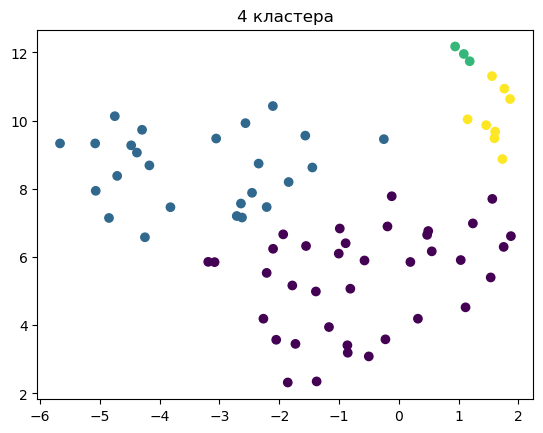

In [79]:
model = TSNE(learning_rate=10)

tr_for_4 = model.fit_transform(q_pop[dir_col])
x_axis = tr_for_4[:, 0]
y_axis = tr_for_4[:, 1]
plt.scatter(x_axis, y_axis, c=q_pop['Кластер_4'])
plt.title('4 кластера')
plt.show()

#### Найдем доверительный интервал в 95% для каждого параметра кластеров.

In [80]:
def conf_inter(dt, col: str, clust_name: str, cluster: int):
    x = np.array(dt[col].loc[dt[clust_name] == cluster])

    n_iter = 1000
    n_size = int(len(x))

    medians = list() 
    for _ in range(n_iter): 
        s = resample(x, n_samples=n_size)
        m = np.median(s); 
        medians.append(m)

    alpha = 0.95
    p = ((1.0-alpha)/2.0) * 100
    lower =  np.percentile(medians, p) 
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper =  np.percentile(medians, p)
    
    return medians, [x for x in medians if x > lower and x < upper], max(medians), np.mean(x)

In [81]:
def dr_plots(dt, col: List[str], clust_name: str):

    plt.figure(figsize = (20, 14))

    clust = 0

    n_clust, n_cols = len(set(dt[clust_name])), len(col)

    modas, means = {}, {}
    for i in range(n_cols*n_clust):
        data, interval, moda, mean = conf_inter(dt, col[i%n_cols], clust_name, clust)
        plt.subplot(n_clust, n_cols, i+1)
        plt.hist(data)
        plt.hist(interval)
        plt.title(f'{col[i%n_cols][:20]} для {clust} кластера', fontsize=8)

        if col[i%n_cols] not in modas:
            modas[col[i%n_cols]] = []
        modas[col[i%n_cols]].append((moda, clust))

        if col[i%n_cols] not in means:
            means[col[i%n_cols]] = []
        means[col[i%n_cols]].append((mean, clust))

        if i%n_cols == n_cols-1:
            clust += 1

    plt.show()

    return modas, means

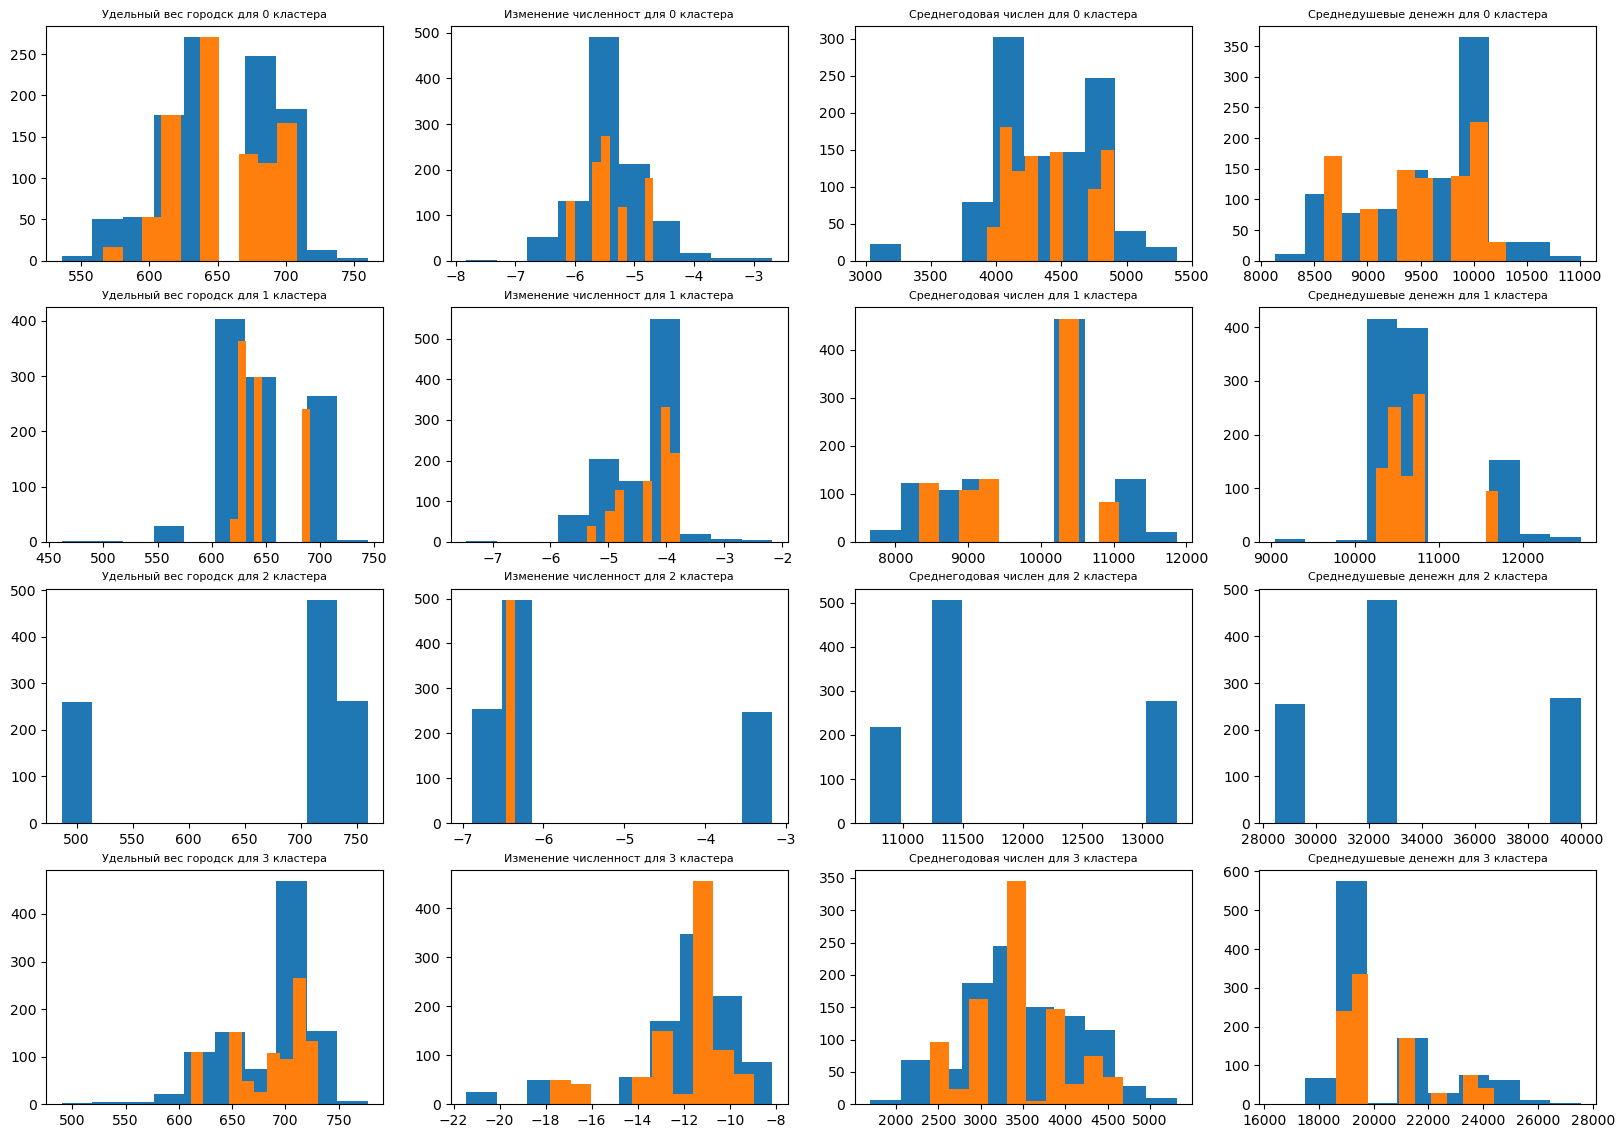

In [82]:
modas_4, means_4 = dr_plots(q_pop, dir_col, 'Кластер_4')

#### Найдем средние и мксимальные значения

In [83]:
def mod_means(modas, means, sub1 = 2, sub2 = 2):
    plt.figure(figsize = (20, 14))
    for iter, col_values in enumerate(modas.items()):
        plt.subplot(sub1, sub2, iter+1)
        plt.bar([x[1]+1 for x in col_values[1]], [x[0] for x in col_values[1]])
        plt.title(col_values[0], fontsize=8) 
    for iter, col_values in enumerate(means.items()):
        plt.subplot(sub1, sub2, iter+1)
        plt.bar([x[1]+1 for x in col_values[1]], [x[0] for x in col_values[1]],  color='r', alpha=0.7)

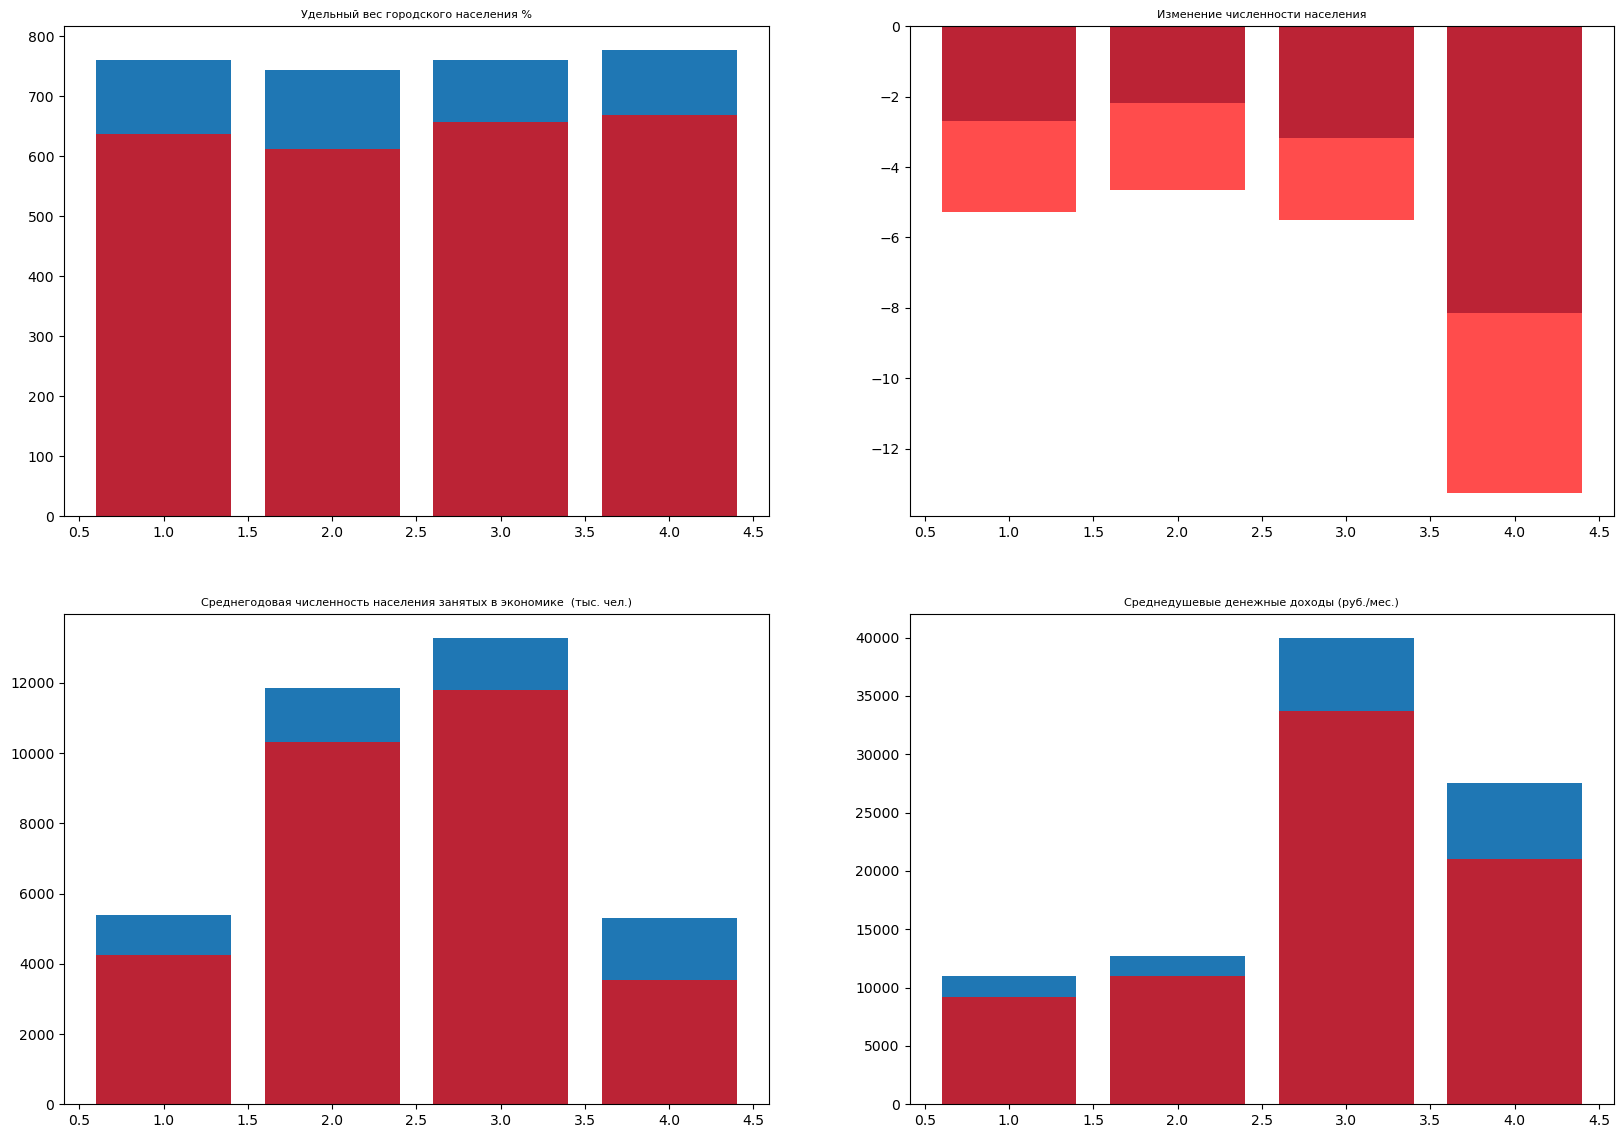

In [84]:
mod_means(modas_4, means_4)

#### Реализуем для 5 кластеров.

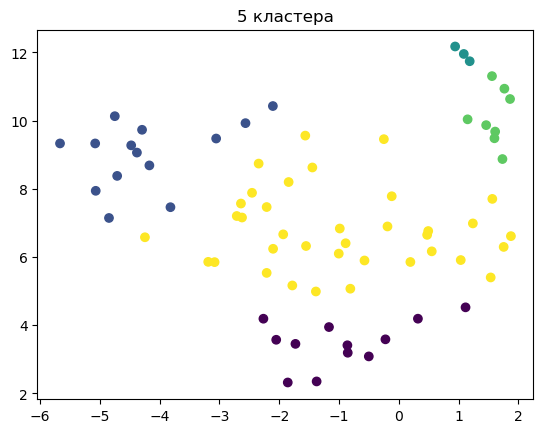

In [85]:
tr_for_4 = model.fit_transform(q_pop[dir_col])
x_axis = tr_for_4[:, 0]
y_axis = tr_for_4[:, 1]
plt.scatter(x_axis, y_axis, c=q_pop['Кластер_5'])
plt.title('5 кластера')
plt.show()

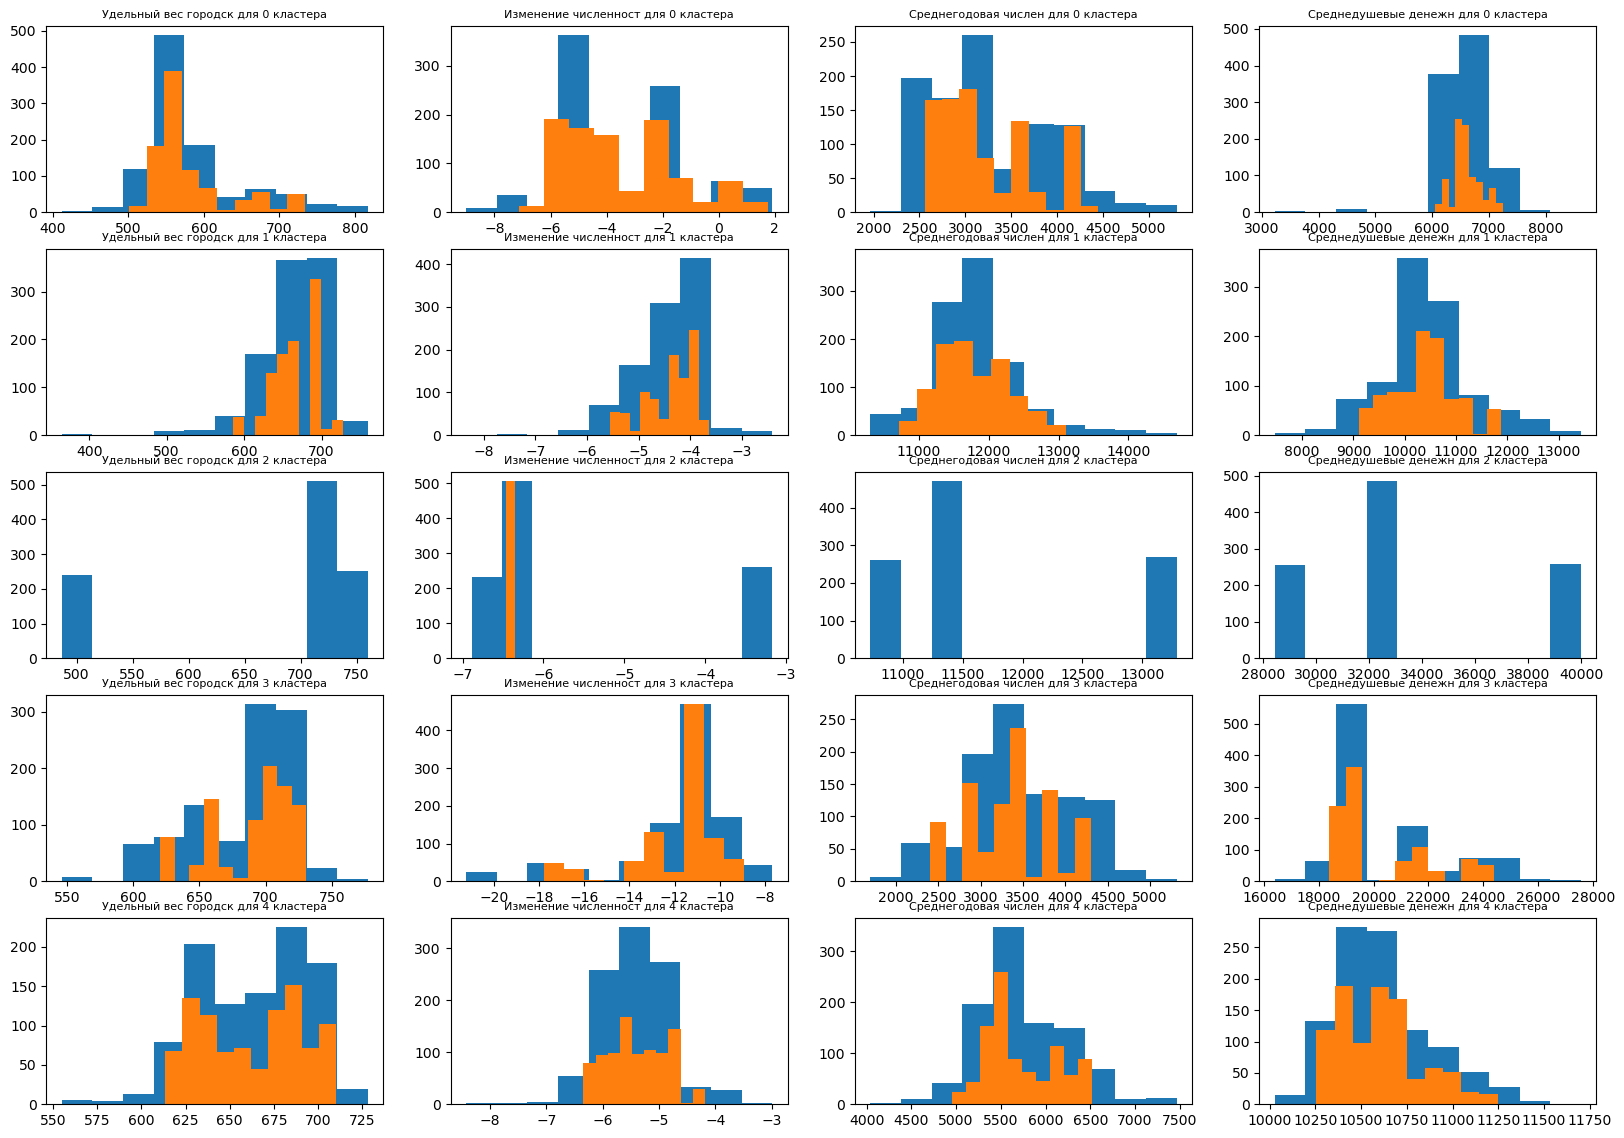

In [86]:
modas_5, means_5 = dr_plots(q_pop, dir_col, 'Кластер_5')

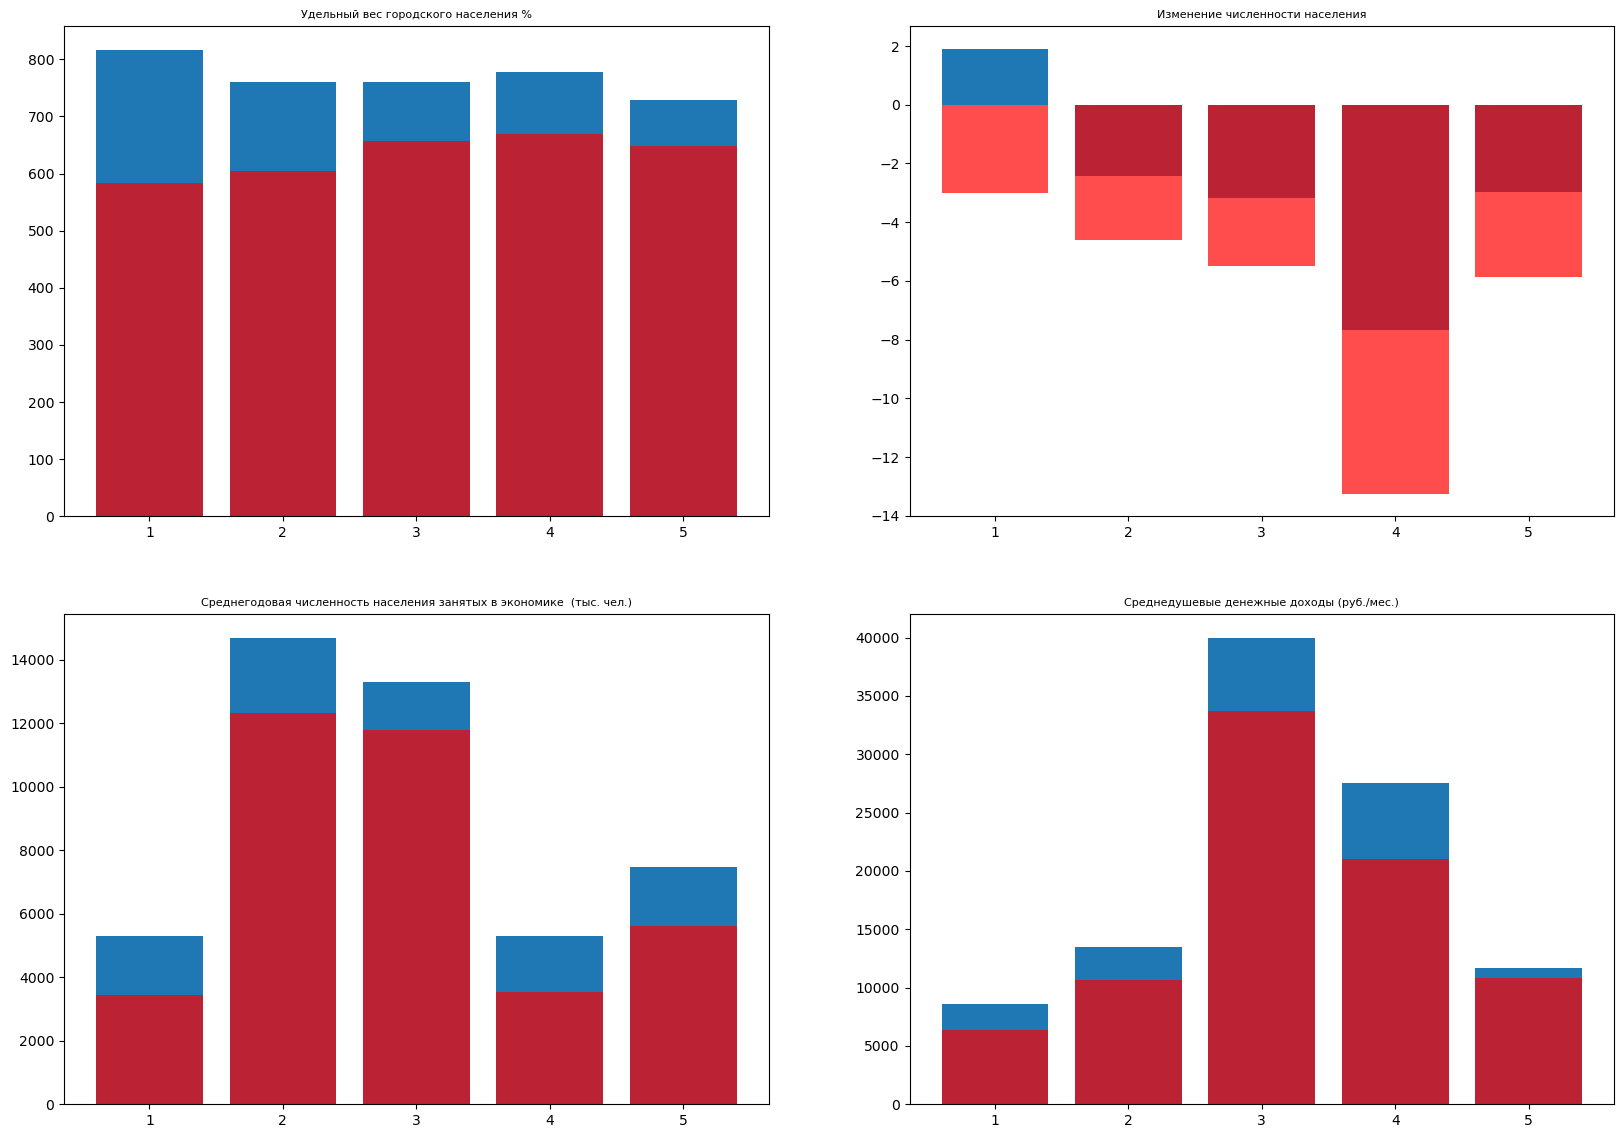

In [87]:
mod_means(modas_5, means_5)

# Раздел 3

In [88]:
banks = pd.read_csv("D:\\МИРЭА\\Машинное обучение\\Пр5\\Banks.csv", encoding='windows-1251', sep='\t')
banks.head()

,Номер,Банк,Рег. Номер,Реутеры,Филиалы,Город,Количество рабочих,Сумма активов,Собственные активы,Банковские активы,...,Привил. ресурсы,"Ссуда, руб.","Ссуда, долл.",Средства в Банке,Межфилиальные средства,Бюджет,Прибыль,Карты,Гос. облигации,Средства ДУ
0,2,Внешторгбанк,1000.0,-,32,Москва,3297,101660298,23236327,84343558,...,18053156,6588171,14842031,30863714,5919300,0,245820,348793,749356,0
1,3,Газпромбанк,354.0,GZPM,27,Москва,2559,79012789,9255041,74409960,...,10154247,8470823,31267375,18833125,4313630,0,355197,455520,123111,8316761
2,4,"ООО ""Международный Промышленный банк""",2056.0,TIBP,4,Москва,459,77888642,26409116,58647197,...,25093336,34043343,8405719,6712070,19195367,23917,306196,3255,38504,1662557
3,5,Международный Московский Банк,1.0,IMBX,1,Москва,621,63910966,1176462,62436148,...,3600147,462037,7797623,38973392,830525,0,0,178071,2033200,720
4,6,"ОАО ""АЛЬФА-БАНК""",1326.0,ALFM,17,Москва,2323,57510886,12446938,52348562,...,11527973,4987776,6077191,28996950,5104405,1594071,1218928,1012419,187085,0


In [89]:
banks.describe()

,Номер,Рег. Номер,Филиалы,Количество рабочих,Сумма активов,Собственные активы,Банковские активы,Депозиты физ. лиц,Депозиты Юр. лиц,Привил. ресурсы,"Ссуда, руб.","Ссуда, долл.",Средства в Банке,Межфилиальные средства,Бюджет,Прибыль,Карты,Гос. облигации,Средства ДУ
count,99.000000,98.000000,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,51.000000,1817.408163,20.101010,732.626263,1.028106e+07,1.518004e+06,8.166384e+06,4.655222e+05,3.290871e+06,1.443386e+06,1.694367e+06,1.566500e+06,2.213331e+06,1.536201e+06,5.307094e+04,8.146619e+04,7.113434e+04,2.728352e+05,1.737630e+05
std,28.722813,995.484007,113.580637,863.623543,1.759679e+07,3.798087e+06,1.502554e+07,7.272206e+05,7.235302e+06,3.569150e+06,3.780585e+06,3.867671e+06,6.021049e+06,4.125647e+06,2.421273e+05,1.677934e+05,1.536984e+05,5.840783e+05,1.049936e+06
min,2.000000,1.000000,0.000000,0.000000,1.324791e+06,0.000000e+00,1.814560e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.409180e+05,0.000000e+00,0.000000e+00,0.000000e+00
25%,26.500000,913.500000,1.000000,191.000000,2.097878e+06,2.261490e+05,1.614724e+06,7.574600e+04,1.757235e+05,5.707450e+04,4.064630e+05,9.162750e+04,2.235120e+05,0.000000e+00,0.000000e+00,6.427000e+03,1.410000e+03,2.837000e+03,0.000000e+00
50%,51.000000,1982.500000,4.000000,320.000000,3.170956e+06,4.636600e+05,2.598064e+06,1.852990e+05,7.925660e+05,2.858150e+05,6.768550e+05,2.557250e+05,4.174880e+05,1.628680e+05,0.000000e+00,2.245900e+04,1.261000e+04,4.550500e+04,0.000000e+00
75%,75.500000,2588.500000,10.500000,935.000000,9.661892e+06,1.127823e+06,6.779936e+06,5.184865e+05,2.787508e+06,1.010068e+06,1.376008e+06,1.158152e+06,1.536078e+06,1.103186e+06,0.000000e+00,7.634550e+04,6.209800e+04,2.001850e+05,0.000000e+00
max,100.000000,3292.000000,1132.000000,3579.000000,1.016603e+08,2.640912e+07,8.434356e+07,4.052929e+06,4.283159e+07,2.509334e+07,3.404334e+07,3.126738e+07,3.897339e+07,3.190323e+07,1.594071e+06,1.218928e+06,1.012419e+06,3.377772e+06,8.316761e+06


In [90]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Номер                   99 non-null     int64  
 1   Банк                    99 non-null     object 
 2   Рег. Номер              98 non-null     float64
 3   Реутеры                 99 non-null     object 
 4   Филиалы                 99 non-null     int64  
 5   Город                   99 non-null     object 
 6   Количество рабочих      99 non-null     int64  
 7   Сумма активов           99 non-null     int64  
 8   Собственные активы      99 non-null     int64  
 9   Банковские активы       99 non-null     int64  
 10  Депозиты физ. лиц       99 non-null     int64  
 11  Депозиты Юр. лиц        99 non-null     int64  
 12  Привил. ресурсы         99 non-null     int64  
 13  Ссуда, руб.             99 non-null     int64  
 14  Ссуда, долл.            99 non-null     int6

In [91]:
banks.columns

Index(['Номер', 'Банк', 'Рег. Номер', 'Реутеры', 'Филиалы', 'Город',
       'Количество рабочих', 'Сумма активов', 'Собственные активы',
       'Банковские активы', 'Депозиты физ. лиц', 'Депозиты Юр. лиц',
       'Привил. ресурсы', 'Ссуда, руб.', 'Ссуда, долл.', 'Средства в Банке',
       'Межфилиальные средства', 'Бюджет', 'Прибыль', 'Карты',
       'Гос. облигации', 'Средства ДУ'],
      dtype='object')

In [92]:
bank_cols = ['Филиалы', 'Сумма активов', 'Собственные активы', 'Банковские активы', 'Средства в Банке']

In [93]:
bank_x = banks[bank_cols]
bank_y = banks['Прибыль']

In [94]:
dt = bank_x.values
targets = bank_y.values 

#### Отобразим начальные данные.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


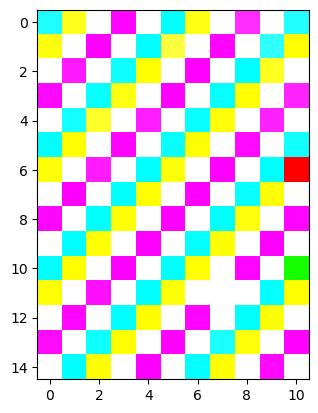

In [95]:
plt.imshow(dt.reshape(15, 11, 3))
plt.show()

#### Масштабируем данные для обучения.

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dt)

StandardScaler()

In [97]:
scaler.mean_

array([2.01010101e+01, 1.02810565e+07, 1.51800433e+06, 8.16638408e+06,
       2.21333062e+06])

#### Реализуем итерационно алгоритм самоорганизующихся карт Кохонена с евклидовой метрикой растояния.

In [98]:
def som(data, k: int, alpha: float, n_iter: int):
    X = data
    n = len(X)
    d = len(X[0])
    addZeros = np.zeros((n, 1))
    X = np.append(X, addZeros, axis=1)
    weight = np.random.rand(d, k)
    start_weight = weight.copy()
    for _ in range(n_iter):
        for i in range(n):
            distMin = 99999999
            for j in range(k):
                dist = np.square(distance.euclidean(weight[:,j], X[i,0:d]))
                if distMin > dist:
                    distMin = dist
                    jMin = j
            weight[:,jMin] = weight[:,jMin]*(1-alpha) + alpha*X[i,0:d]
        alpha = 0.5*alpha

    for i in range(n):
        cluster, distMin = 0, 999999999
        for j in range(k):
            dist = np.square(distance.euclidean(weight[:,j], X[i,0:d]))
            if distMin > dist:
                distMin = dist
                cluster = j
        X[i,d] = cluster
    return start_weight, weight, X

In [99]:
k = 4
alpha = 0.6
n_iter = 10000
tr_dt = scaler.transform(dt)


#### Обучим модель.

In [101]:
start, weights, result = som(tr_dt, k, alpha, n_iter)

#### Понизим пространство, чтобы отобразить результаты.

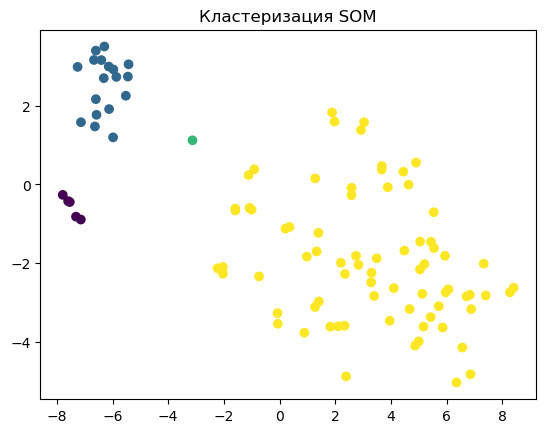

In [102]:
tr_for_bank = model.fit_transform(result)
x_axis = tr_for_bank[:, 0]
y_axis = tr_for_bank[:, 1]
plt.scatter(x_axis, y_axis, c=result[:, -1])
plt.title('Кластеризация SOM')
plt.show()

In [103]:
banks['Кластер'] = result[:, -1]
for k, cnt in [(k, banks.loc[banks['Кластер'] == k]['Кластер'].count()) for k in range(4)]:
    print(f'Кластер: {k} количество: {cnt}')

Кластер: 0 количество: 5
Кластер: 1 количество: 18
Кластер: 2 количество: 1
Кластер: 3 количество: 75


In [104]:
banks.loc[banks['Кластер'] == 0].head(3)

,Номер,Банк,Рег. Номер,Реутеры,Филиалы,Город,Количество рабочих,Сумма активов,Собственные активы,Банковские активы,...,"Ссуда, руб.","Ссуда, долл.",Средства в Банке,Межфилиальные средства,Бюджет,Прибыль,Карты,Гос. облигации,Средства ДУ,Кластер
0,2,Внешторгбанк,1000.0,-,32,Москва,3297,101660298,23236327,84343558,...,6588171,14842031,30863714,5919300,0,245820,348793,749356,0,0.0
1,3,Газпромбанк,354.0,GZPM,27,Москва,2559,79012789,9255041,74409960,...,8470823,31267375,18833125,4313630,0,355197,455520,123111,8316761,0.0
2,4,"ООО ""Международный Промышленный банк""",2056.0,TIBP,4,Москва,459,77888642,26409116,58647197,...,34043343,8405719,6712070,19195367,23917,306196,3255,38504,1662557,0.0


In [105]:
banks.loc[banks['Кластер'] == 1].head(3)

,Номер,Банк,Рег. Номер,Реутеры,Филиалы,Город,Количество рабочих,Сумма активов,Собственные активы,Банковские активы,...,"Ссуда, руб.","Ссуда, долл.",Средства в Банке,Межфилиальные средства,Бюджет,Прибыль,Карты,Гос. облигации,Средства ДУ,Кластер
5,7,"ОАО ""ПСБ""",439.0,ICSP,44,Санкт-Петербург,3579,49406525,1275859,17091603,...,5187620,3416332,2626908,31903232,0,271635,153087,1696127,10509,1.0
6,8,Банк Москвы,2748.0,-,34,Москва,2810,31352124,3335734,30287158,...,8826718,4860894,3781859,945517,0,53771,221612,0,0,1.0
7,9,"АКБ ""РОСБАНК"" (ОАО)",2272.0,-,13,Москва,989,28105202,4691449,25807591,...,6691829,5882163,8848426,1479585,607332,257710,134021,774727,0,1.0


In [106]:
banks.loc[banks['Кластер'] == 2].head(3)

,Номер,Банк,Рег. Номер,Реутеры,Филиалы,Город,Количество рабочих,Сумма активов,Собственные активы,Банковские активы,...,"Ссуда, руб.","Ссуда, долл.",Средства в Банке,Межфилиальные средства,Бюджет,Прибыль,Карты,Гос. облигации,Средства ДУ,Кластер
77,79,"ОАО ""СОЦИНВЕСТБАНК""",11.0,-,1132,Уфа,1177,1790708,222197,1654724,...,532518,1096,175156,105444,0,39848,1529,109693,0,2.0


In [107]:
banks.loc[banks['Кластер'] == 3].head(3)

,Номер,Банк,Рег. Номер,Реутеры,Филиалы,Город,Количество рабочих,Сумма активов,Собственные активы,Банковские активы,...,"Ссуда, руб.","Ссуда, долл.",Средства в Банке,Межфилиальные средства,Бюджет,Прибыль,Карты,Гос. облигации,Средства ДУ,Кластер
21,23,"ОАО ""Ханты-Мансийский банк """,1971.0,-,6,Ханты-Мансийск,473,12722589,323652,2987333,...,574549,60600,705074,475546,55,30679,51722,64584,0,3.0
22,24,"ОАО ""Банк ""Петровский """,729.0,PETR,18,Санкт-Петербург,3395,12589085,439907,5943321,...,2255752,785076,100843,6624531,0,12461,81654,710009,0,3.0
25,27,НОМОС-БАНК,2209.0,NMOS,1,Москва,260,8916553,1416318,8799375,...,3275069,1126402,1798646,99319,0,16548,27282,396064,137,3.0


In [108]:
bank_cols.append('Прибыль')

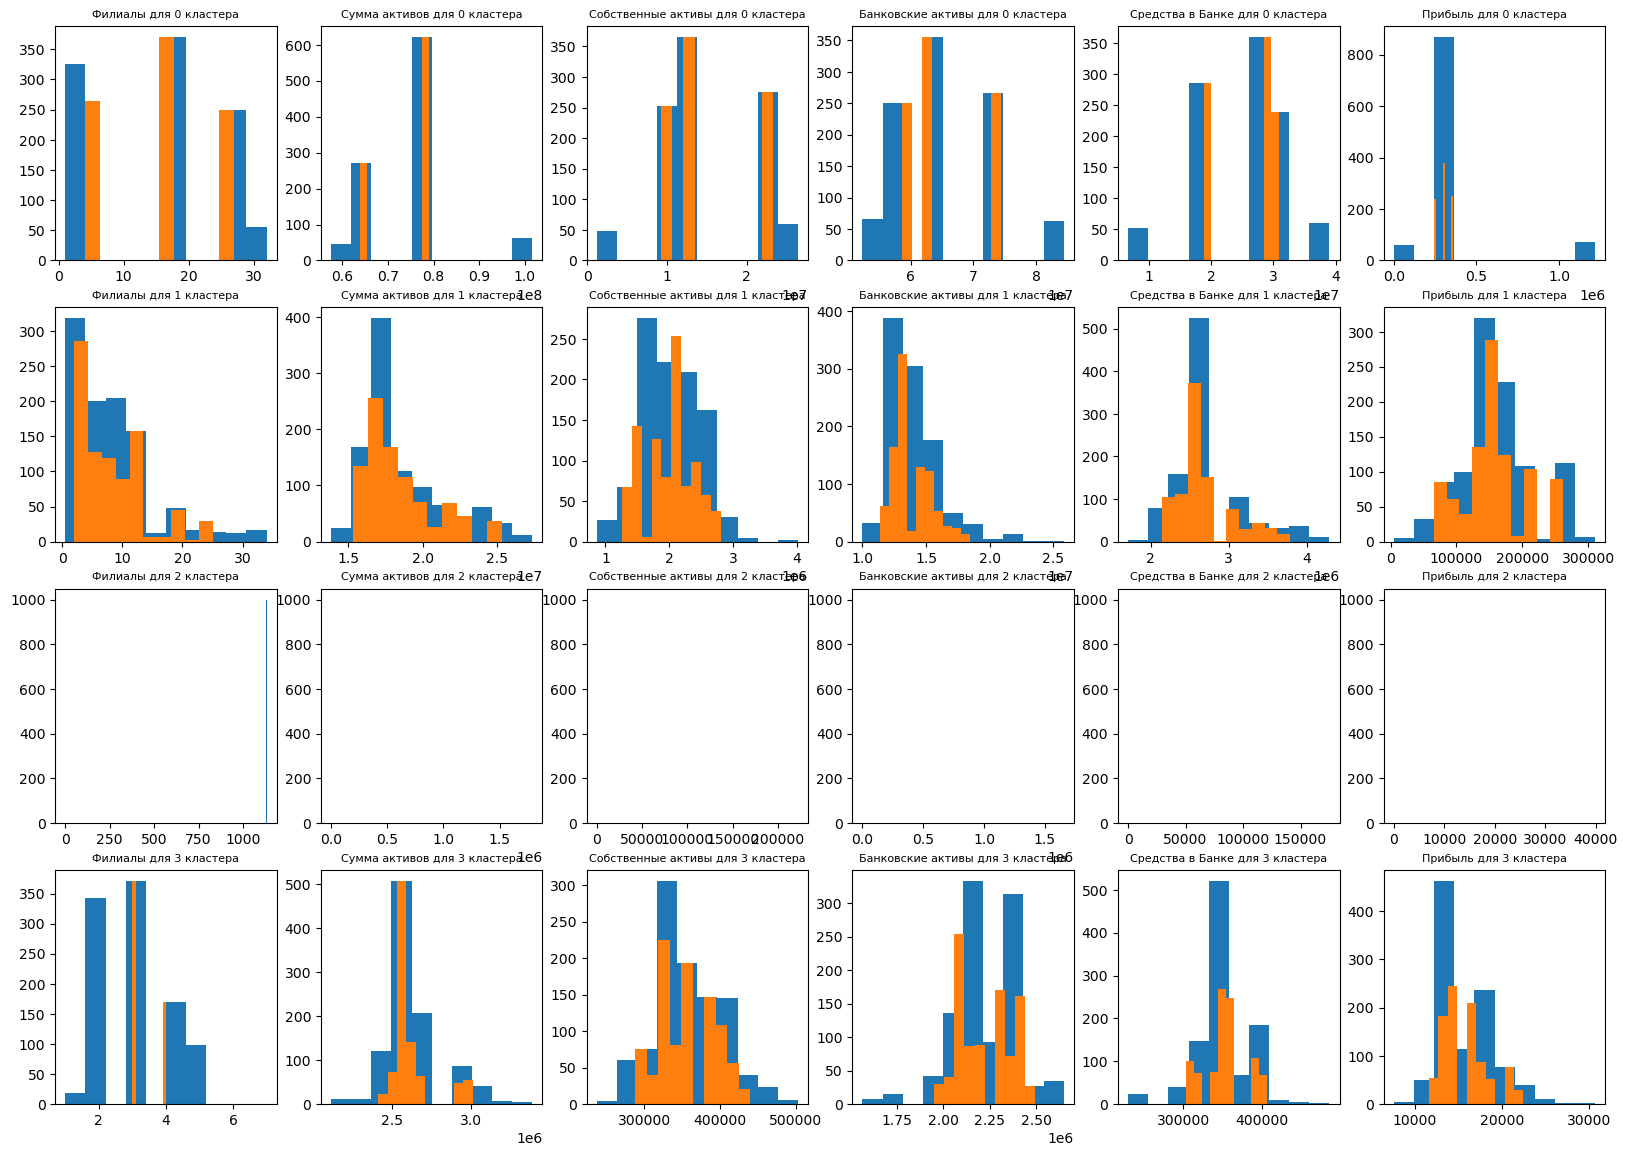

In [110]:
modas_b, means_b = dr_plots(banks, bank_cols, 'Кластер')

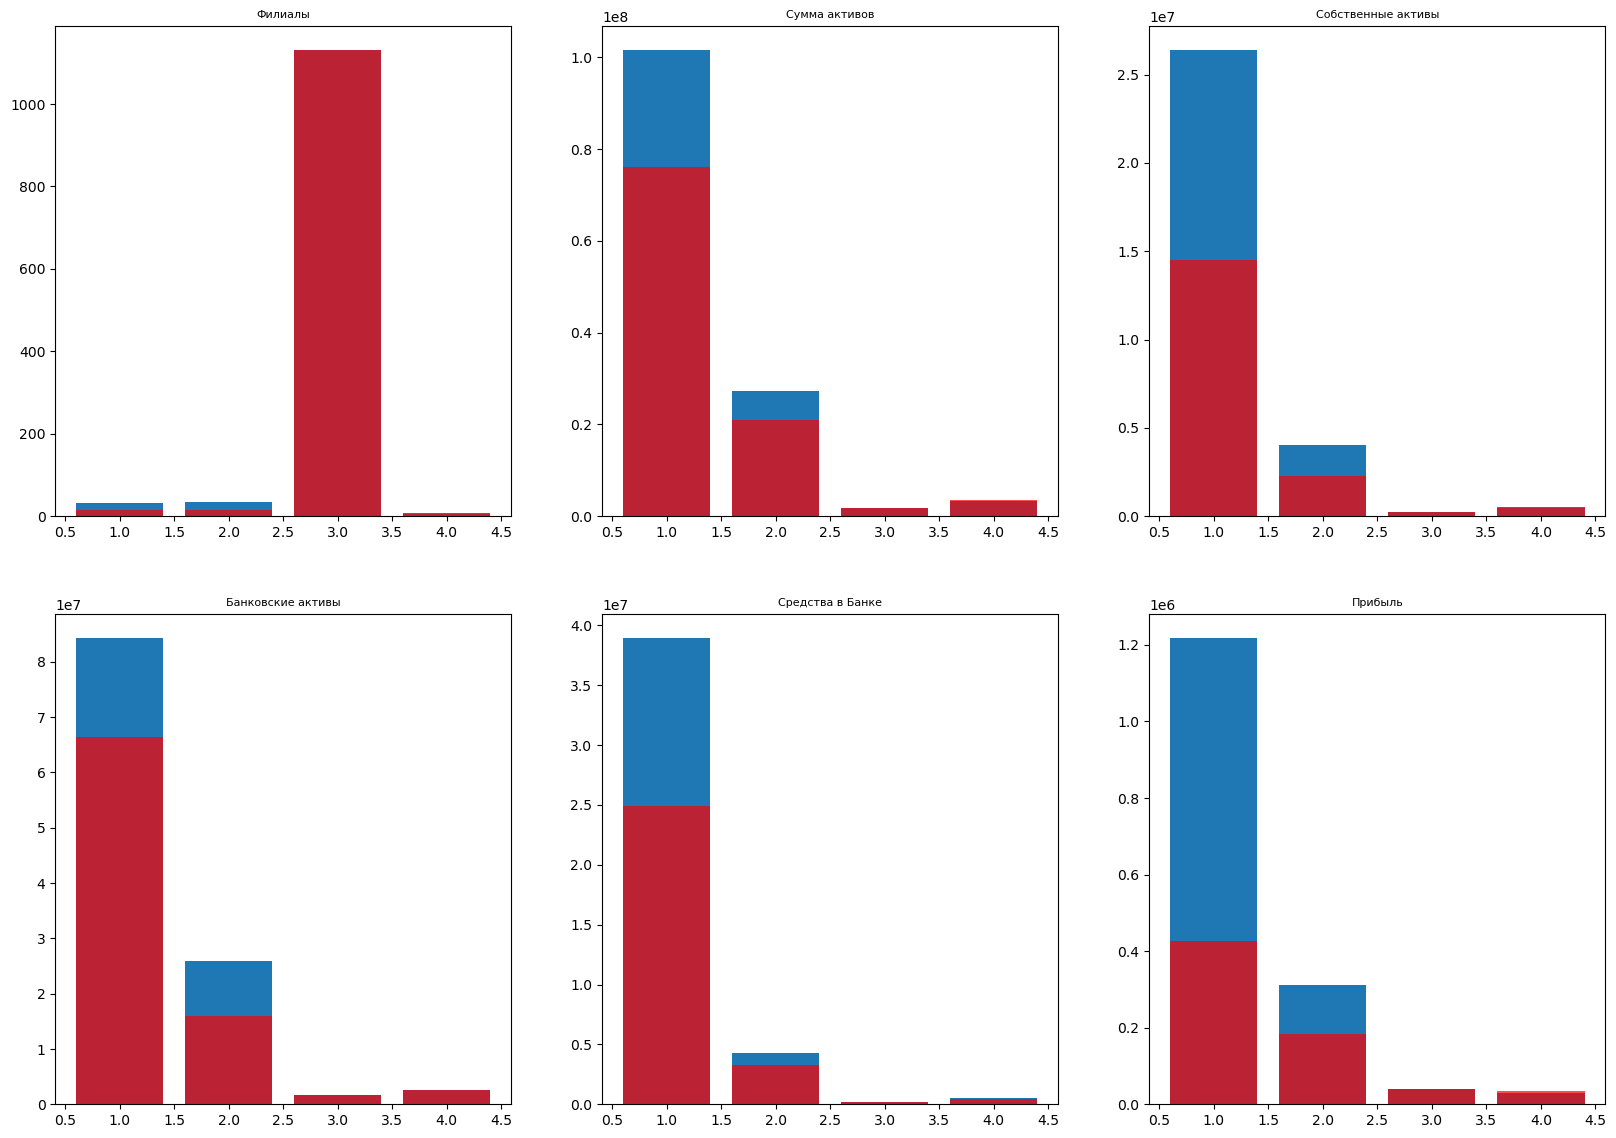

In [112]:
mod_means(modas_b, means_b, sub1=2, sub2=3)